## Customer Churn Prediction - Classification Problem

## Objective:
A machine learning model to predict customer churn based on historical customer data. 


## Import the Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#### 1. Data Preprocessing

In [5]:
data = pd.read_csv('customer_churn_large_dataset.csv')
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


#### Observations:
The data has only float and integer values.
There are no missing values

In [7]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
data.shape

(100000, 9)

#### Observation
Dataset comprises 100000 observations(rows) and 9 features(columns).

In [9]:
data.duplicated().sum()

0

#### Observation:
There is no duplicated value in any column

In [10]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

#### Observation:
There is no missing value in any column

In [29]:
data.drop(columns=['CustomerID','Name'], inplace = True)

#### 2. Data Visualization

In [14]:
df_location = data['Location'].value_counts()
df_location

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

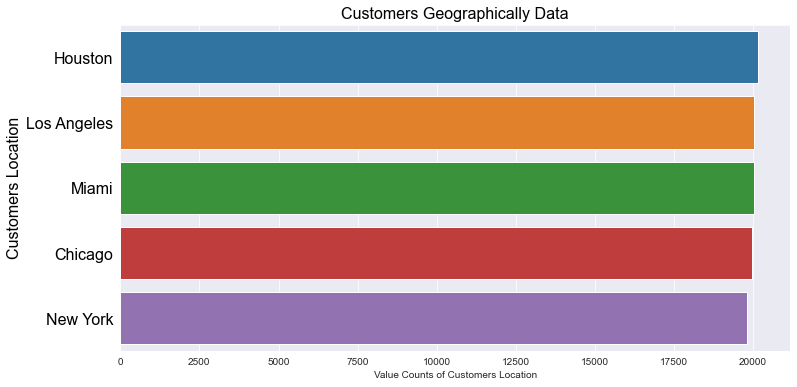

In [55]:
plt.figure(figsize=(12,6))
res = sns.barplot(x=df_location, y=df_location.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=16, color='black')
plt.xlabel('Value Counts of Customers Location')
plt.ylabel('Customers Location', fontsize=16, color = 'black')

plt.title('Customers Geographically Data', fontsize=16, color = 'black')
plt.show()

In [20]:

df_gender = data['Gender'].value_counts()
df_gender

Female    50216
Male      49784
Name: Gender, dtype: int64

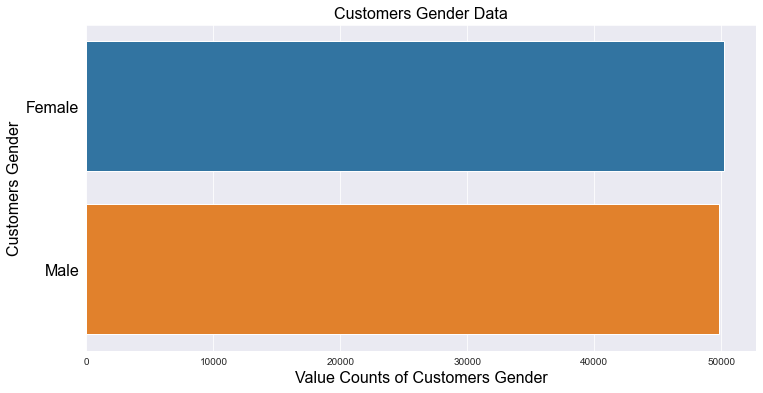

In [22]:
plt.figure(figsize=(12,6))
res = sns.barplot(x=df_gender, y=df_gender.index)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=16, color='black')
plt.xlabel('Value Counts of Customers Gender', fontsize=16, color = 'black')
plt.ylabel('Customers Gender', fontsize=16, color = 'black')

plt.title('Customers Gender Data', fontsize=16, color = 'black')
plt.show()

In [24]:
df_churn = data['Churn'].value_counts()
df_churn

0    50221
1    49779
Name: Churn, dtype: int64

C:\Users\user\AppData\Local\Temp/ipykernel_11992/2657704574.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  res.set_yticklabels(res.get_ymajorticklabels(), fontsize=16, color='black')


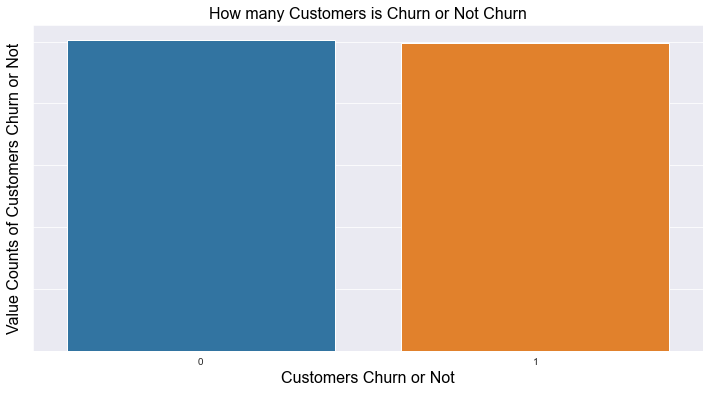

In [57]:
plt.figure(figsize=(12,6))
res = sns.barplot(x=df_churn.index, y=df_churn)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=16, color='black')
plt.ylabel('Value Counts of Customers Churn or Not', fontsize=16, color = 'black')
plt.xlabel('Customers Churn or Not', fontsize=16, color = 'black')

plt.title('How many Customers is Churn or Not Churn', fontsize=16, color = 'black')
plt.show()

#### 3. Feature Engineering

In [30]:
df = pd.get_dummies(data, columns = ['Gender','Location'], drop_first = True)

In [31]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [32]:
y = df['Churn']
X = df.drop('Churn',axis=1)

#### 4. Training the Data 


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (80000, 9)
X_test Shape :  (20000, 9)
y_train Shape :  (80000,)
y_test Shape :  (20000,)


#### 5. Model Selection

In [39]:
#import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [40]:
#loading thelogistic regression model to the variable 'classifier'
classifier = LogisticRegression () 

In [42]:
#training the model on traing data
classifier.fit(X_train, y_train)

LogisticRegression()

#### 6. Model Evaluation

In [43]:
#import accuracy_score

prediction_on_training_data = classifier.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train,prediction_on_training_data)
print ('Accuracy on training data: ' ,accuracy_on_training_data )

Accuracy on training data:  0.50255


In [44]:
#predicton on test data
prediction_on_test_data = classifier.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)
print ('Accuracy on test data: ' ,accuracy_on_test_data )

Accuracy on test data:  0.4999


#### 7. Model Deployment

In [59]:
input_data =(63,17,73.36,236,1,0,1,0,0)
#change the input data to numpy array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
# print(input_data)

#reshape the array as we are pedicting the output for one instance 
input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)

#prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction) #return a list with element [0], if Not churn/ return a list with element [1, if churn]

if (prediction[0] == 0):
    print ('Not Churn')
else:
    print ('Churn')

[1]
Churn


In [58]:
input_data =(36,3,97.94,297,0,0,0,1,0)
#change the input data to numpy array to make prediction
input_data_as_numpy_array = np.asarray(input_data)
# print(input_data)

#reshape the array as we are pedicting the output for one instance 
input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)

#prediction
prediction = classifier.predict(input_data_reshaped)
print(prediction) #return a list with element [0], if Not churn/ return a list with element [1, if churn]

if (prediction[0] == 0):
    print ('Churn')
else:
    print ('Not Churn')

[0]
Churn
